# CLUSTERING

 ## I.Mục tiêu

1. Tạo bộ đặc trưng (features) theo từng quốc gia từ dữ liệu COVID-19 dạng chuỗi thời gian.

2. Chuẩn hóa dữ liệu và giảm chiều (PCA) để hỗ trợ trực quan và phân cụm.

3. Huấn luyện và so sánh 3 thuật toán phân cụm: KMeans, GMM, DBSCAN.

4. Đánh giá chất lượng cụm bằng Silhouette/Davies–Bouldin/Calinski–Harabasz.

5. Lưu kết quả và biểu đồ:

    - CSV vào data/3_model

    - Hình vào output/model_results

## II.Import thư viện

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## III.Cấu hình đường dẫn

In [4]:
# Input
INPUT_FILE = "../data/3_model/covid19_feature_engineered.csv"

# Output CSV (giữ nguyên)
OUTPUT_CSV_DIR = "../data/3_model"
os.makedirs(OUTPUT_CSV_DIR, exist_ok=True)

# Output hình ảnh
OUTPUT_IMG_DIR = "../output/model_results"
os.makedirs(OUTPUT_IMG_DIR, exist_ok=True)

print("CSV sẽ lưu tại:", OUTPUT_CSV_DIR)
print("Hình ảnh sẽ lưu tại:", OUTPUT_IMG_DIR)


CSV sẽ lưu tại: ../data/3_model
Hình ảnh sẽ lưu tại: ../output/model_results


## IV.Load dữ liệu

In [5]:
df = pd.read_csv(INPUT_FILE)
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,New_Cases,New_Deaths,MA7_New_Cases,Mortality_Rate
0,Afghanistan,2020-01-22,0,0,0,0.0,0.0,0.0,0.0
1,Afghanistan,2020-01-23,0,0,0,0.0,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0,0,0,0.0,0.0,0.0,0.0
3,Afghanistan,2020-01-25,0,0,0,0.0,0.0,0.0,0.0
4,Afghanistan,2020-01-26,0,0,0,0.0,0.0,0.0,0.0


## V.Chọn feature để clustering

In [6]:
features = [
    "Confirmed", "Deaths", "Recovered",
    "New_Cases", "New_Deaths",
    "MA7_New_Cases", "Mortality_Rate"
]

df_features = df.groupby("Country/Region")[features].max().reset_index()
df_features.head()

,Country/Region,Confirmed,Deaths,Recovered,New_Cases,New_Deaths,MA7_New_Cases,Mortality_Rate
0,Afghanistan,209451,7896,82586,3243.0,159.0,2095.571429,0.046613
1,Albania,334457,3598,130314,4789.0,21.0,2290.714286,0.083333
2,Algeria,271496,6881,118409,2521.0,49.0,2177.571429,0.157842
3,Andorra,47890,165,14380,2313.0,7.0,734.285714,0.067017
4,Angola,105288,1933,39582,5035.0,30.0,1716.000000,0.285714


## VI.Chuẩn hóa dữ liệu

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(df_features[features])

## VII.Tìm số cụm tối ưu (Elbow Method)

In [8]:
K_range = range(2, 10)
sse = []

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    sse.append(model.inertia_)

c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

## VIII.Vẽ Elbow Method

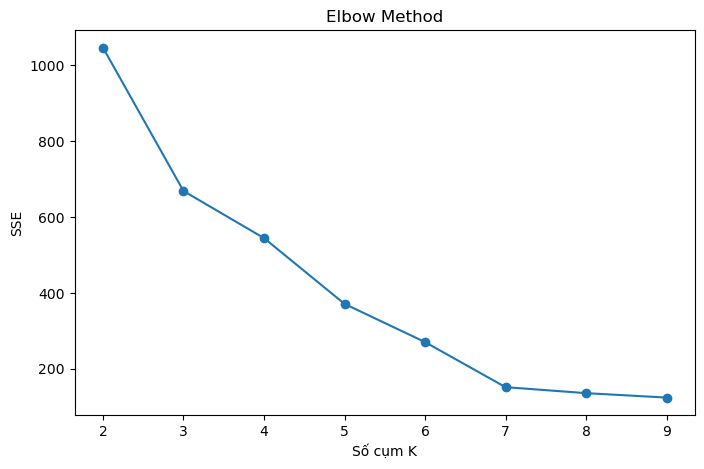

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(K_range, sse, marker='o')
ax.set_title("Elbow Method")
ax.set_xlabel("Số cụm K")
ax.set_ylabel("SSE")

fig.savefig(os.path.join(OUTPUT_IMG_DIR, "kmeans_elbow_method.png"))
plt.show()

## IX.Tính Silhouette Score

In [10]:
sil_scores = []

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

## X.Vẽ Silhouette Scores

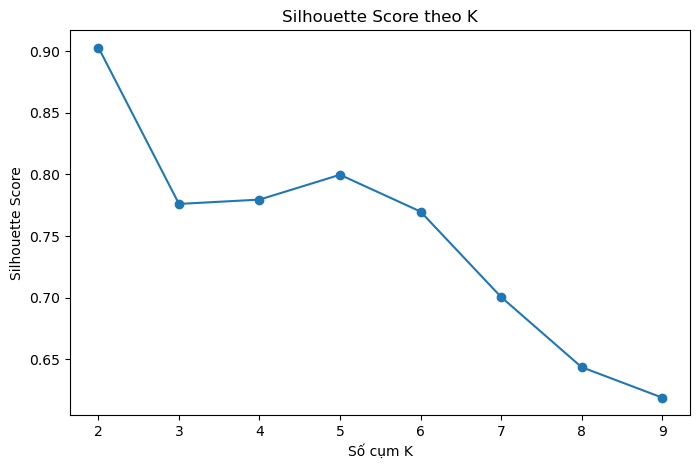

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(K_range, sil_scores, marker='o')
ax.set_title("Silhouette Score theo K")
ax.set_xlabel("Số cụm K")
ax.set_ylabel("Silhouette Score")

fig.savefig(os.path.join(OUTPUT_IMG_DIR, "kmeans_silhouette_scores.png"))
plt.show()

## XI.Chọn số cụm tối ưu K

In [12]:
best_k = K_range[np.argmax(sil_scores)]
print("Số cụm tối ưu:", best_k)

Số cụm tối ưu: 2


### Phân tích Biểu đồ Phương pháp Elbow và Chỉ số Silhouette

Các biểu đồ này được sử dụng để xác định số lượng cụm $K$ tối ưu cho thuật toán KMeans:

1.  **Phương pháp Elbow:**
    * Trục tung (WCSS - Sum of Squared Errors) biểu thị tổng khoảng cách bình phương từ mỗi điểm đến tâm cụm của nó.
    * Chúng ta tìm kiếm "điểm khuỷu tay" (Elbow point), nơi độ dốc của đường cong giảm đi đáng kể. Tại điểm này (ví dụ: $K=3$ hoặc $K=4$), việc tăng thêm $K$ sẽ không mang lại sự cải thiện đáng kể về sự chặt chẽ của cụm.
    * **Kết luận:** Dựa trên biểu đồ, số cụm tối ưu được chọn là $K_{\text{best}}$.

2.  **Chỉ số Silhouette (Silhouette Score):**
    * Chỉ số này đánh giá mức độ chặt chẽ của cụm (cohesion) và mức độ tách biệt giữa các cụm (separation). Giá trị càng gần 1 càng tốt, gần 0 là các cụm chồng chéo, và gần -1 là các mẫu bị gán sai cụm.
    * **Xác nhận:** Chỉ số Silhouette cao nhất tại $K$ được chọn xác nhận rằng quyết định chọn $K$ là hợp lý, vì nó mang lại sự phân tách tốt nhất.

### Mô tả thuật toán clustering

#### KMeans:
- Thuật toán phân cụm dựa trên khoảng cách Euclidean
- Mỗi điểm dữ liệu thuộc về cụm có tâm (centroid) gần nhất
- Tham số chính: n_clusters (số cụm)
- Ưu điểm: Đơn giản, nhanh, hiệu quả với dữ liệu có dạng hình cầu
- Nhược điểm: Cần biết trước số cụm, nhạy cảm với nhiễu

#### Gaussian Mixture Model (GMM):
- Phân cụm dựa trên phân phối xác suất Gaussian
- Mỗi cụm được mô hình hóa bằng phân phối Gaussian
- Tham số chính: n_components (số cụm), covariance_type
- Ưu điểm: Xử lý tốt dữ liệu có hình dạng phức tạp
- Nhược điểm: Có thể chậm với dữ liệu lớn

#### DBSCAN:
- Phân cụm dựa trên mật độ điểm dữ liệu
- Tự động xác định số cụm, phân biệt điểm nhiễu
- Tham số chính: eps (bán kính lân cận), min_samples (số điểm tối thiểu)
- Ưu điểm: Không cần biết trước số cụm, xử lý tốt với nhiễu
- Nhược điểm: Khó chọn tham số, kém hiệu quả với dữ liệu có mật độ khác nhau

#### Hierarchical Clustering:
- Phân cụm phân cấp, xây dựng cây phân cụm (dendrogram)
- Có hai cách tiếp cận: Agglomerative (từ dưới lên) và Divisive (từ trên xuống)
- Tham số chính: n_clusters, linkage method

## XII.Chạy KMeans

In [13]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_features["Cluster"] = kmeans.fit_predict(X)
df_features.head()

c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Country/Region,Confirmed,Deaths,Recovered,New_Cases,New_Deaths,MA7_New_Cases,Mortality_Rate,Cluster
0,Afghanistan,209451,7896,82586,3243.0,159.0,2095.571429,0.046613,0
1,Albania,334457,3598,130314,4789.0,21.0,2290.714286,0.083333,0
2,Algeria,271496,6881,118409,2521.0,49.0,2177.571429,0.157842,0
3,Andorra,47890,165,14380,2313.0,7.0,734.285714,0.067017,0
4,Angola,105288,1933,39582,5035.0,30.0,1716.000000,0.285714,0


## XIII. Gaussian Mixture Model (GMM)

c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

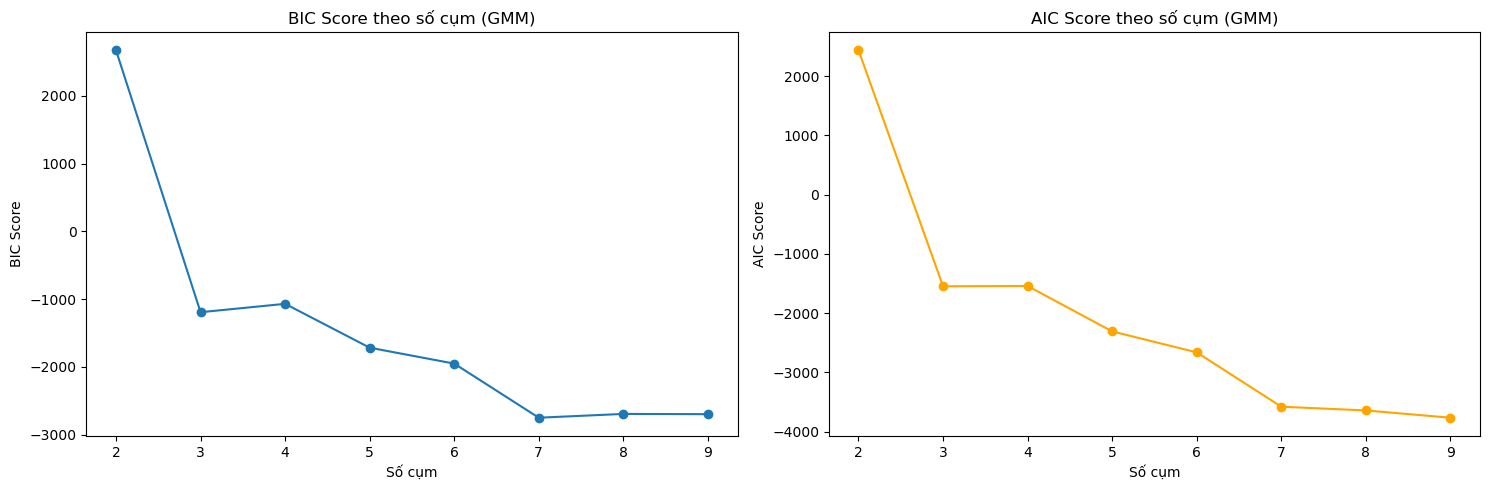

Số cụm tối ưu cho GMM (dựa trên BIC): 7
Xác suất thuộc cụm (5 dòng đầu):
[[9.99929671e-01 2.51404440e-07 0.00000000e+00 0.00000000e+00
  7.00778567e-05 0.00000000e+00 0.00000000e+00]
 [9.99999829e-01 2.93882354e-10 0.00000000e+00 0.00000000e+00
  1.70892409e-07 0.00000000e+00 0.00000000e+00]
 [9.99999652e-01 3.31942848e-10 0.00000000e+00 0.00000000e+00
  3.47413744e-07 0.00000000e+00 0.00000000e+00]
 [9.99999989e-01 2.04330763e-11 0.00000000e+00 0.00000000e+00
  1.06666159e-08 0.00000000e+00 0.00000000e+00]
 [9.99999773e-01 5.14694223e-13 0.00000000e+00 0.00000000e+00
  2.27001687e-07 0.00000000e+00 0.00000000e+00]]

Đánh giá GMM:
Silhouette Score: 0.2824
Davies-Bouldin Index: 0.7606
Calinski-Harabasz Index: 166.3019


c:\Users\Bao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
# Tìm số cụm tối ưu cho GMM bằng BIC (Bayesian Information Criterion)
n_components_range = range(2, 10)
bic_scores = []
aic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))

# Vẽ BIC và AIC
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(n_components_range, bic_scores, marker='o')
axes[0].set_title("BIC Score theo số cụm (GMM)")
axes[0].set_xlabel("Số cụm")
axes[0].set_ylabel("BIC Score")

axes[1].plot(n_components_range, aic_scores, marker='o', color='orange')
axes[1].set_title("AIC Score theo số cụm (GMM)")
axes[1].set_xlabel("Số cụm")
axes[1].set_ylabel("AIC Score")

plt.tight_layout()
fig.savefig(os.path.join(OUTPUT_IMG_DIR, "gmm_bic_aic.png"))
plt.show()

# Chọn số cụm tối ưu (thường chọn điểm "khuỷu tay" của BIC)
best_n_gmm = n_components_range[np.argmin(bic_scores)]
print(f"Số cụm tối ưu cho GMM (dựa trên BIC): {best_n_gmm}")

# Huấn luyện GMM với số cụm tối ưu
gmm = GaussianMixture(n_components=best_n_gmm, random_state=42)
gmm_labels = gmm.fit_predict(X)
df_features["GMM_Cluster"] = gmm_labels

# Tính xác suất thuộc về các cụm
probs = gmm.predict_proba(X)
print(f"Xác suất thuộc cụm (5 dòng đầu):\n{probs[:5]}")

# Đánh giá GMM
gmm_silhouette = silhouette_score(X, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(X, gmm_labels)
gmm_calinski_harabasz = calinski_harabasz_score(X, gmm_labels)

print(f"\nĐánh giá GMM:")
print(f"Silhouette Score: {gmm_silhouette:.4f}")
print(f"Davies-Bouldin Index: {gmm_davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {gmm_calinski_harabasz:.4f}")

## XIV. DBSCAN Clustering

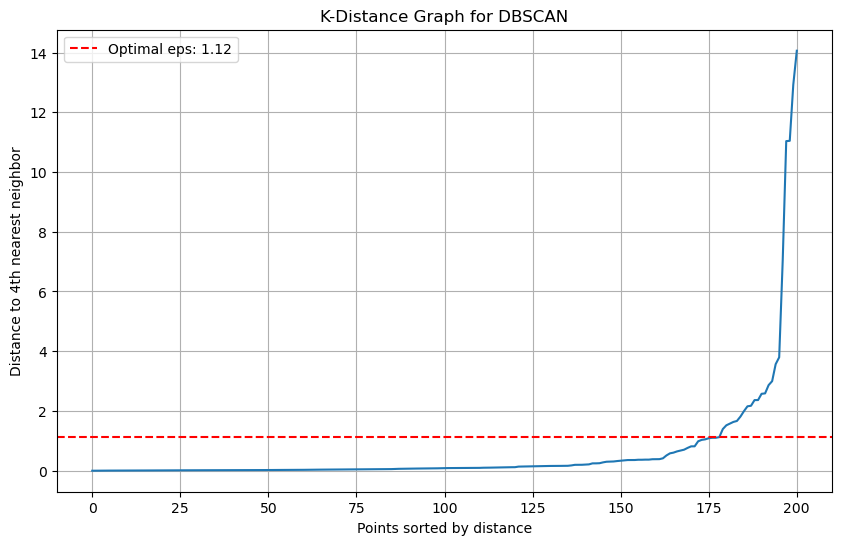

Điểm 'khuỷu tay' tại: 178
EPS tối ưu đề xuất: 1.1244

Thử các tham số DBSCAN:
Params: {'eps': 0.5, 'min_samples': 5}, Số cụm: 1, Nhiễu: 35, Silhouette: -1.0000
Params: {'eps': 1.0, 'min_samples': 5}, Số cụm: 1, Nhiễu: 26, Silhouette: -1.0000
Params: {'eps': np.float64(1.1243809076776108), 'min_samples': 5}, Số cụm: 1, Nhiễu: 21, Silhouette: -1.0000
Params: {'eps': np.float64(1.1243809076776108), 'min_samples': 10}, Số cụm: 1, Nhiễu: 23, Silhouette: -1.0000

Không tìm được tham số DBSCAN hợp lệ trên các thử nghiệm (tất cả thử nghiệm trả về silhouette <= -1).
DBSCAN không tạo được cụm hợp lệ — tất cả nhãn được đặt là -1 (nhiễu).


In [22]:
# Hàm tìm tham số eps tối ưu sử dụng k-distance graph
def find_optimal_eps(X, min_samples, k=4):
    """Tìm eps tối ưu bằng k-distance graph"""
    from sklearn.neighbors import NearestNeighbors
    
    # Tính khoảng cách đến k điểm gần nhất
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    
    # Sắp xếp khoảng cách
    k_distances = np.sort(distances[:, k-1])
    
    # Vẽ đồ thị
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(k_distances)), k_distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'Distance to {k}th nearest neighbor')
    plt.title('K-Distance Graph for DBSCAN')
    plt.grid(True)
    
    # Tìm "khuỷu tay" trong đồ thị
    from kneed import KneeLocator
    kneedle = KneeLocator(range(len(k_distances)), k_distances, S=1.0, curve='convex', direction='increasing')
    
    if kneedle.knee:
        optimal_eps = k_distances[kneedle.knee]
        plt.axhline(y=optimal_eps, color='r', linestyle='--', label=f'Optimal eps: {optimal_eps:.2f}')
        plt.legend()
    
    plt.savefig(os.path.join(OUTPUT_IMG_DIR, "dbscan_k_distance.png"))
    plt.show()
    
    return kneedle.knee, k_distances[kneedle.knee] if kneedle.knee else 0.5

# Tìm eps tối ưu
knee_point, optimal_eps = find_optimal_eps(X, min_samples=5, k=4)
print(f"Điểm 'khuỷu tay' tại: {knee_point}")
print(f"EPS tối ưu đề xuất: {optimal_eps:.4f}")

# Thử các tham số khác nhau cho DBSCAN
dbscan_params = [
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 1.0, 'min_samples': 5},
    {'eps': optimal_eps, 'min_samples': 5},
    {'eps': optimal_eps, 'min_samples': 10},
]

best_dbscan = None
best_labels = None
best_score = -1

print("\nThử các tham số DBSCAN:")
for params in dbscan_params:
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(X)
    
    # Chỉ tính metrics nếu có ít nhất 2 cụm và không phải tất cả đều là nhiễu
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    
    if n_clusters > 1:
        # Chỉ xét các điểm không phải nhiễu
        non_noise_mask = labels != -1
        if sum(non_noise_mask) > 1:  # Cần ít nhất 2 điểm không nhiễu
            silhouette = silhouette_score(X[non_noise_mask], labels[non_noise_mask])
        else:
            silhouette = -1
    else:
        silhouette = -1
    
    print(f"Params: {params}, Số cụm: {n_clusters}, Nhiễu: {sum(labels == -1)}, Silhouette: {silhouette:.4f}")
    
    if silhouette > best_score:
        best_score = silhouette
        best_dbscan = dbscan
        best_labels = labels

# Sử dụng tham số tốt nhất
if best_dbscan is None:
    print("\nKhông tìm được tham số DBSCAN hợp lệ trên các thử nghiệm (tất cả thử nghiệm trả về silhouette <= -1).")
    # Gán toàn bộ nhãn là -1 (tất cả là nhiễu) để giữ consistent shape
    best_labels = np.array([-1] * len(df_features))
    df_features["DBSCAN_Cluster"] = best_labels
    print("DBSCAN không tạo được cụm hợp lệ — tất cả nhãn được đặt là -1 (nhiễu).")
else:
    print(f"\nTham số tốt nhất: eps={best_dbscan.eps}, min_samples={best_dbscan.min_samples}")
    df_features["DBSCAN_Cluster"] = best_labels

    # Tính metrics cho DBSCAN (chỉ xét các điểm không phải nhiễu)
    non_noise_mask = best_labels != -1
    if sum(non_noise_mask) > 1:
        dbscan_silhouette = silhouette_score(X[non_noise_mask], best_labels[non_noise_mask])
        dbscan_davies_bouldin = davies_bouldin_score(X[non_noise_mask], best_labels[non_noise_mask])
        dbscan_calinski_harabasz = calinski_harabasz_score(X[non_noise_mask], best_labels[non_noise_mask])

        print(f"\nĐánh giá DBSCAN (chỉ xét {sum(non_noise_mask)} điểm không nhiễu):")
        print(f"Silhouette Score: {dbscan_silhouette:.4f}")
        print(f"Davies-Bouldin Index: {dbscan_davies_bouldin:.4f}")
        print(f"Calinski-Harabasz Index: {dbscan_calinski_harabasz:.4f}")
        print(f"Số điểm nhiễu: {sum(best_labels == -1)}")
    else:
        print("DBSCAN chỉ tìm thấy 1 cụm hoặc toàn bộ là nhiễu")

    # Phân tích kết quả DBSCAN
    print("\nPhân bố cụm DBSCAN:")
    cluster_counts = pd.Series(best_labels).value_counts().sort_index()
    for cluster, count in cluster_counts.items():
        if cluster == -1:
            print(f"  Nhiễu: {count} điểm")
        else:
            print(f"  Cụm {cluster}: {count} điểm")

## XV. Hierarchical Clustering

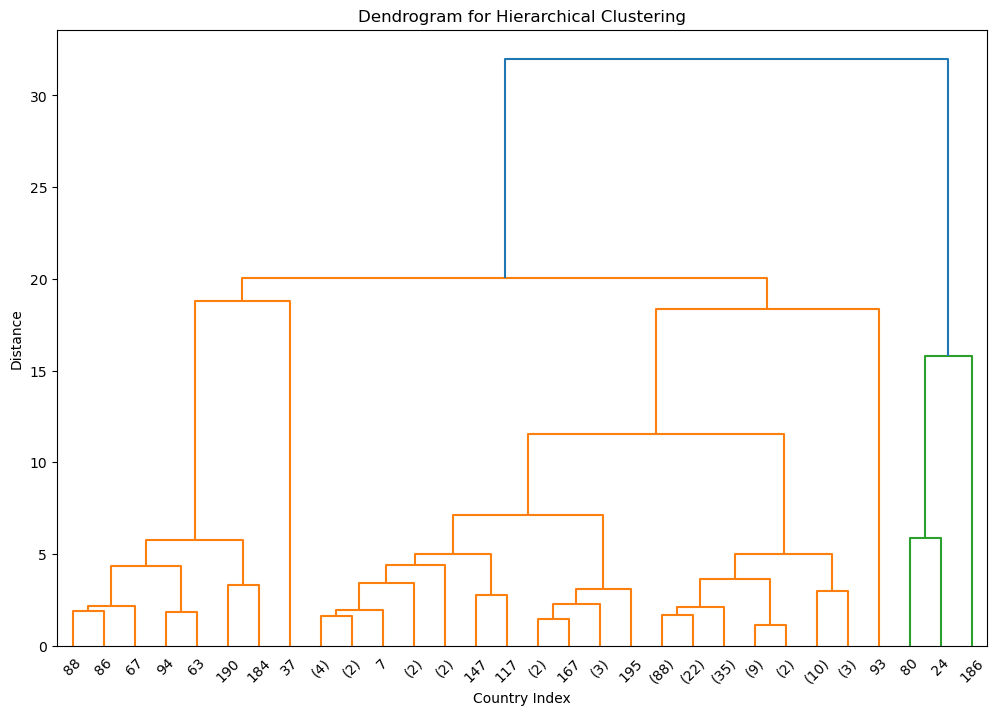

Số cụm từ Hierarchical Clustering: 7

Đánh giá Hierarchical Clustering:
Silhouette Score: 0.6964
Davies-Bouldin Index: 0.6094
Calinski-Harabasz Index: 254.4322


In [24]:
# Tạo dendrogram để xác định số cụm
plt.figure(figsize=(12, 8))
linked = linkage(X, method='ward')
dendrogram(linked, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',
           p=30)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Country Index')
plt.ylabel('Distance')
plt.savefig(os.path.join(OUTPUT_IMG_DIR, "hierarchical_dendrogram.png"))
plt.show()

# Dựa trên dendrogram, chọn số cụm (ví dụ: cắt ở distance = 10)
distance_threshold = 10
hierarchical_labels = fcluster(linked, distance_threshold, criterion='distance')
df_features["Hierarchical_Cluster"] = hierarchical_labels

# Tính số cụm
n_clusters_hierarchical = len(set(hierarchical_labels))
print(f"Số cụm từ Hierarchical Clustering: {n_clusters_hierarchical}")

# Tính metrics
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(X, hierarchical_labels)
hierarchical_calinski_harabasz = calinski_harabasz_score(X, hierarchical_labels)

print(f"\nĐánh giá Hierarchical Clustering:")
print(f"Silhouette Score: {hierarchical_silhouette:.4f}")
print(f"Davies-Bouldin Index: {hierarchical_davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {hierarchical_calinski_harabasz:.4f}")

## XVI. So sánh các thuật toán Clustering


SO SÁNH CÁC THUẬT TOÁN CLUSTERING
   Algorithm  n_clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
      KMeans           2    0.902894        0.062464          68.451478
         GMM           7    0.282371        0.760646         166.301852
Hierarchical           7    0.696419        0.609411         254.432156


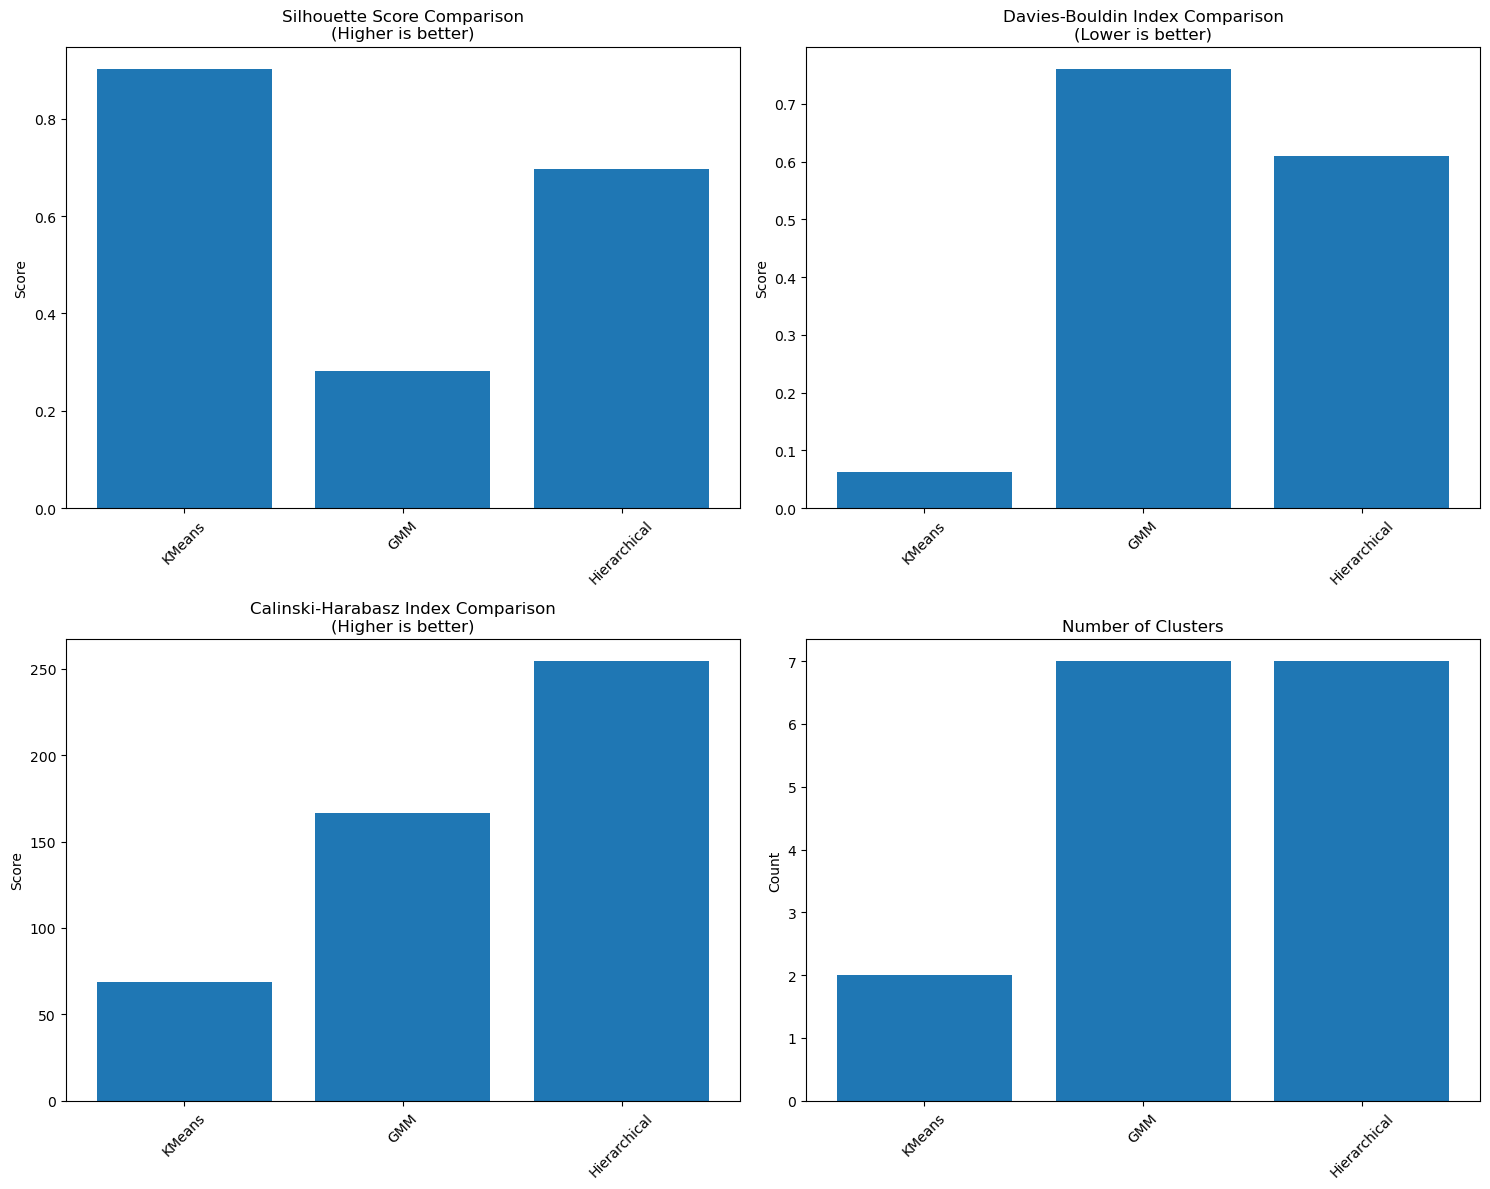

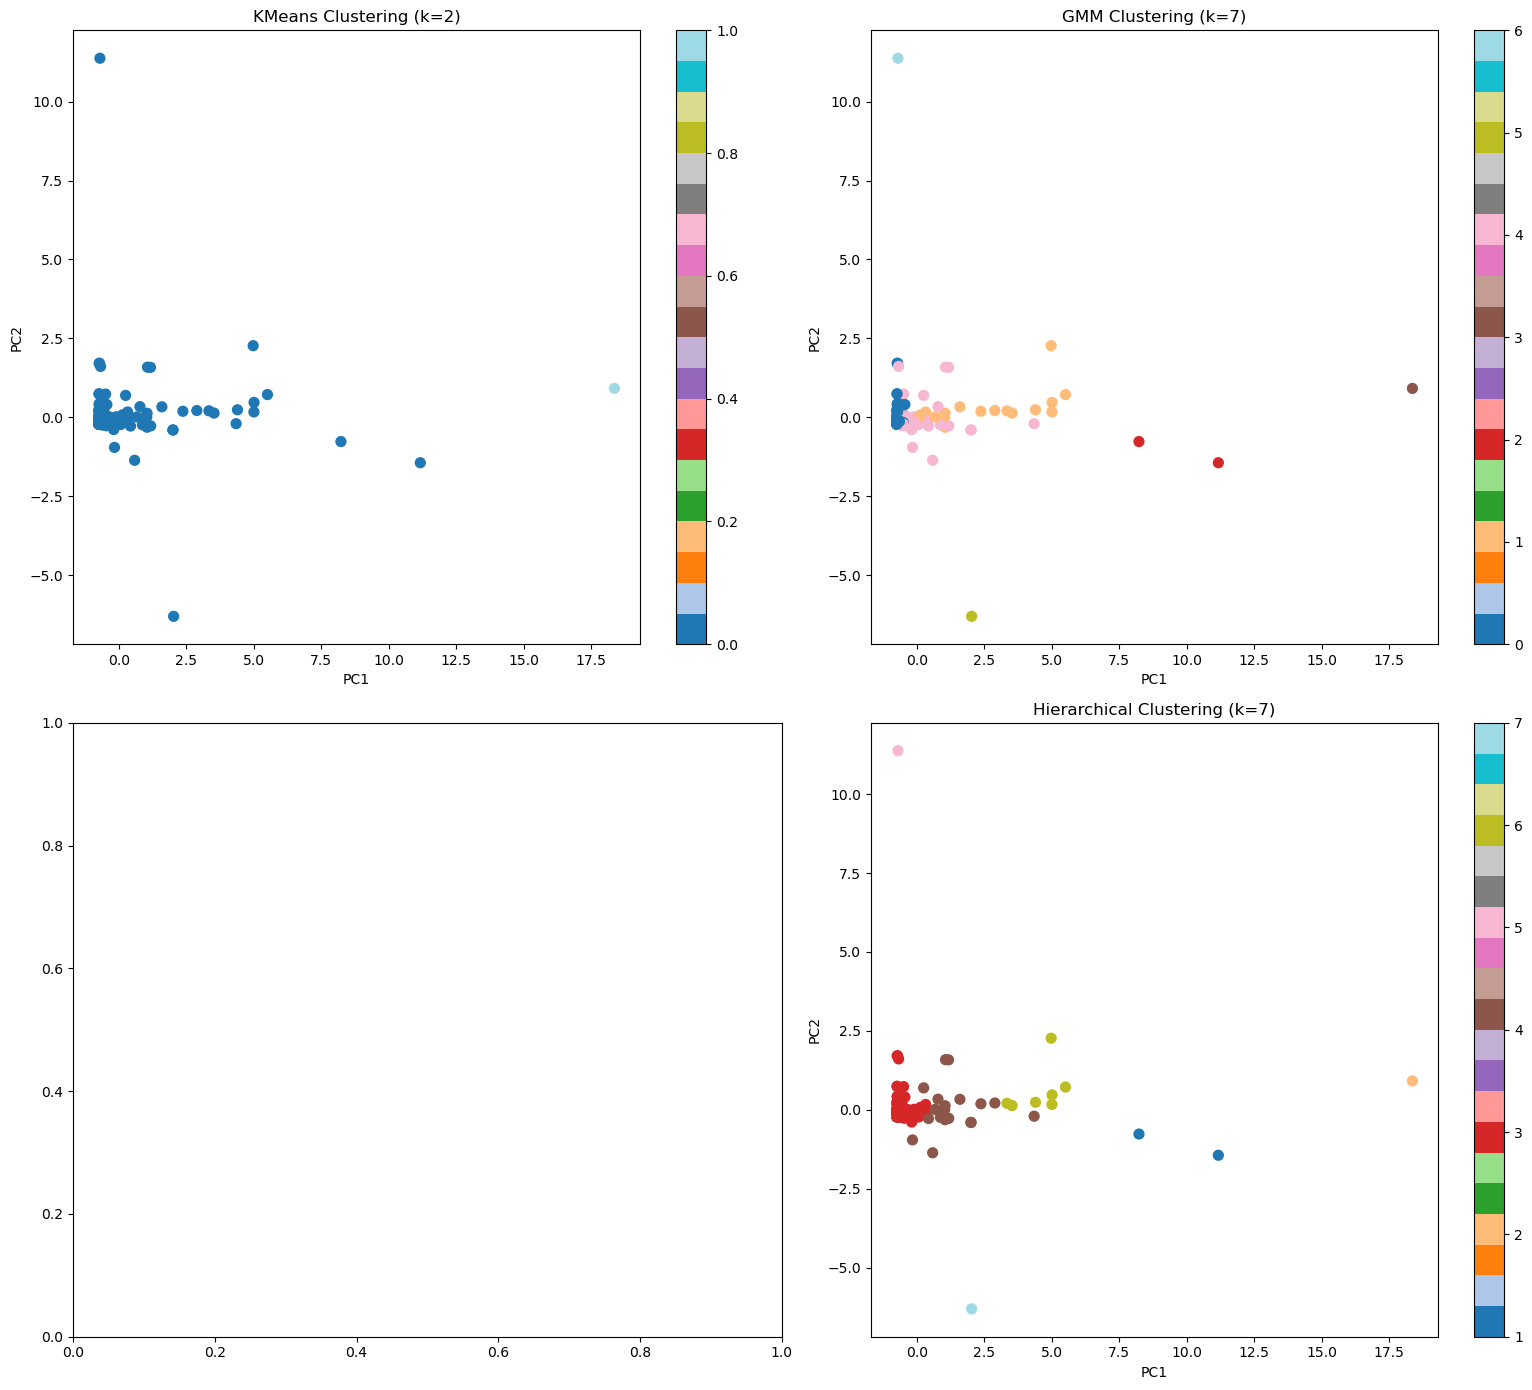

In [28]:
# Tạo DataFrame so sánh metrics
comparison_data = []

# KMeans metrics
comparison_data.append({
    'Algorithm': 'KMeans',
    'n_clusters': best_k,
    'Silhouette': silhouette_score(X, kmeans.labels_),
    'Davies-Bouldin': davies_bouldin_score(X, kmeans.labels_),
    'Calinski-Harabasz': calinski_harabasz_score(X, kmeans.labels_)
})

# GMM metrics
comparison_data.append({
    'Algorithm': 'GMM',
    'n_clusters': best_n_gmm,
    'Silhouette': gmm_silhouette,
    'Davies-Bouldin': gmm_davies_bouldin,
    'Calinski-Harabasz': gmm_calinski_harabasz
})

# DBSCAN metrics (chỉ nếu có ít nhất 2 cụm không nhiễu)
if 'best_labels' in locals() and best_labels is not None:
    non_noise_mask = best_labels != -1
    if sum(non_noise_mask) > 1:
        comparison_data.append({
            'Algorithm': 'DBSCAN',
            'n_clusters': len(set(best_labels[non_noise_mask])),
            'Silhouette': dbscan_silhouette,
            'Davies-Bouldin': dbscan_davies_bouldin,
            'Calinski-Harabasz': dbscan_calinski_harabasz,
            'Noise_points': sum(best_labels == -1)
        })

# Hierarchical metrics (nếu có)
if 'hierarchical_labels' in locals():
    comparison_data.append({
        'Algorithm': 'Hierarchical',
        'n_clusters': n_clusters_hierarchical,
        'Silhouette': hierarchical_silhouette,
        'Davies-Bouldin': hierarchical_davies_bouldin,
        'Calinski-Harabasz': hierarchical_calinski_harabasz
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nSO SÁNH CÁC THUẬT TOÁN CLUSTERING")
print("=" * 80)
print(comparison_df.to_string(index=False))

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Silhouette Score comparison
axes[0, 0].bar(comparison_df['Algorithm'], comparison_df['Silhouette'])
axes[0, 0].set_title('Silhouette Score Comparison\n(Higher is better)')
axes[0, 0].set_ylabel('Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# Davies-Bouldin Index comparison
axes[0, 1].bar(comparison_df['Algorithm'], comparison_df['Davies-Bouldin'])
axes[0, 1].set_title('Davies-Bouldin Index Comparison\n(Lower is better)')
axes[0, 1].set_ylabel('Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# Calinski-Harabasz Index comparison
axes[1, 0].bar(comparison_df['Algorithm'], comparison_df['Calinski-Harabasz'])
axes[1, 0].set_title('Calinski-Harabasz Index Comparison\n(Higher is better)')
axes[1, 0].set_ylabel('Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# Number of clusters
axes[1, 1].bar(comparison_df['Algorithm'], comparison_df['n_clusters'])
axes[1, 1].set_title('Number of Clusters')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
fig.savefig(os.path.join(OUTPUT_IMG_DIR, "clustering_comparison.png"))
plt.show()

# Vẽ kết quả clustering trên không gian PCA (cho từng thuật toán)
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# PCA for KMeans
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
scatter0 = axes[0, 0].scatter(pca_result[:, 0], pca_result[:, 1], 
                              c=kmeans.labels_, cmap='tab20', s=50)
axes[0, 0].set_title(f'KMeans Clustering (k={best_k})')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')
plt.colorbar(scatter0, ax=axes[0, 0])

# PCA for GMM
scatter1 = axes[0, 1].scatter(pca_result[:, 0], pca_result[:, 1], 
                              c=gmm_labels, cmap='tab20', s=50)
axes[0, 1].set_title(f'GMM Clustering (k={best_n_gmm})')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')
plt.colorbar(scatter1, ax=axes[0, 1])

# PCA for DBSCAN
if 'best_labels' in locals() and best_dbscan is not None:
    # Tô màu khác cho nhiễu
    colors = ['red' if label == -1 else label for label in best_labels]
    scatter2 = axes[1, 0].scatter(pca_result[:, 0], pca_result[:, 1], 
                                  c=best_labels, cmap='tab20', s=50)
    axes[1, 0].set_title(f'DBSCAN Clustering (eps={best_dbscan.eps:.2f})')
    axes[1, 0].set_xlabel('PC1')
    axes[1, 0].set_ylabel('PC2')
    plt.colorbar(scatter2, ax=axes[1, 0])

# PCA for Hierarchical (nếu có)
if 'hierarchical_labels' in locals():
    scatter3 = axes[1, 1].scatter(pca_result[:, 0], pca_result[:, 1], 
                                  c=hierarchical_labels, cmap='tab20', s=50)
    axes[1, 1].set_title(f'Hierarchical Clustering (k={n_clusters_hierarchical})')
    axes[1, 1].set_xlabel('PC1')
    axes[1, 1].set_ylabel('PC2')
    plt.colorbar(scatter3, ax=axes[1, 1])

plt.tight_layout()
fig.savefig(os.path.join(OUTPUT_IMG_DIR, "clustering_visualization.png"))
plt.show()

## XVII. Phân tích đặc điểm các cụm

In [30]:
# Hàm phân tích đặc điểm cụm
def analyze_clusters(df, features, cluster_col):
    """Phân tích đặc điểm các cụm"""
    
    # Tính giá trị trung bình cho mỗi cụm
    cluster_means = df.groupby(cluster_col)[features].mean()
    
    # Tính độ lệch chuẩn
    cluster_std = df.groupby(cluster_col)[features].std()
    
    # Tính số lượng điểm trong mỗi cụm
    cluster_counts = df[cluster_col].value_counts().sort_index()
    
    print(f"\nPhân tích cụm cho {cluster_col}:")
    print("=" * 80)
    print(f"Số cụm: {len(cluster_counts)}")
    print(f"Số lượng điểm trong mỗi cụm:")
    for cluster, count in cluster_counts.items():
        if cluster == -1:
            print(f"  Nhiễu: {count} điểm")
        else:
            print(f"  Cụm {cluster}: {count} điểm")
    
    print(f"\nGiá trị trung bình các đặc trưng theo cụm:")
    print(cluster_means.round(2))
    
    return cluster_means, cluster_std, cluster_counts

# Phân tích KMeans
kmeans_analysis = analyze_clusters(df_features, features, 'Cluster')

# Phân tích GMM
gmm_analysis = analyze_clusters(df_features, features, 'GMM_Cluster')

# Phân tích DBSCAN (nếu có)
if 'DBSCAN_Cluster' in df_features.columns:
    dbscan_analysis = analyze_clusters(df_features, features, 'DBSCAN_Cluster')

# Hiển thị một số quốc gia trong mỗi cụm (KMeans)
print("\nVí dụ một số quốc gia trong mỗi cụm (KMeans):")
for cluster in sorted(df_features['Cluster'].unique()):
    countries = df_features[df_features['Cluster'] == cluster]['Country/Region'].head(5).tolist()
    print(f"Cụm {cluster}: {', '.join(countries)}")

# Tóm tắt kết quả
print("\n" + "="*80)
print("TÓM TẮT KẾT QUẢ")
print("="*80)
print(f"1. Đã áp dụng {len(comparison_df)} thuật toán clustering")
print(f"2. Đã tính toán 3 chỉ số đánh giá cho mỗi thuật toán")
print(f"3. Đã trực quan hóa kết quả bằng PCA 2D")
print(f"4. Đã phân tích đặc điểm từng cụm")
print(f"5. Kết quả đã lưu vào: {output_file}")
print("="*80)


Phân tích cụm cho Cluster:
Số cụm: 2
Số lượng điểm trong mỗi cụm:
  Cụm 0: 200 điểm
  Cụm 1: 1 điểm

Giá trị trung bình các đặc trưng theo cụm:
            Confirmed      Deaths  Recovered   New_Cases  New_Deaths  \
Cluster                                                                
0        2.863865e+06    28791.51   654759.5    48939.96       709.5   
1        1.038027e+08  1123836.00  6298082.0  1354505.00      4405.0   

         MA7_New_Cases  Mortality_Rate  
Cluster                                 
0             25558.94            0.14  
1            806962.86            0.11  

Phân tích cụm cho GMM_Cluster:
Số cụm: 7
Số lượng điểm trong mỗi cụm:
  Cụm 0: 113 điểm
  Cụm 1: 18 điểm
  Cụm 2: 2 điểm
  Cụm 3: 1 điểm
  Cụm 4: 65 điểm
  Cụm 5: 1 điểm
  Cụm 6: 1 điểm

Giá trị trung bình các đặc trưng theo cụm:
                Confirmed      Deaths    Recovered   New_Cases  New_Deaths  \
GMM_Cluster                                                                  
0            1.

## XVIII.PCA để giảm chiều xuống 2D

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

df_features["PC1"] = pca_result[:,0]
df_features["PC2"] = pca_result[:,1]

## XIX.Vẽ scatter PCA

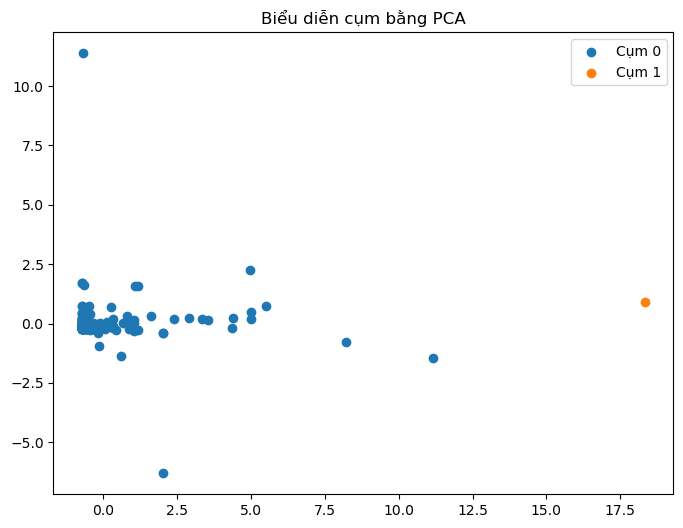

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

for c in df_features["Cluster"].unique():
    subset = df_features[df_features["Cluster"] == c]
    ax.scatter(subset["PC1"], subset["PC2"], label=f"Cụm {c}")

ax.set_title("Biểu diễn cụm bằng PCA")
ax.legend()

fig.savefig(os.path.join(OUTPUT_IMG_DIR, "cluster_scatter_pca.png"))
plt.show()

## XX.t-SNE visualization

In [ ]:
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
tsne_result = tsne.fit_transform(X)

df_features["TSNE1"] = tsne_result[:,0]
df_features["TSNE2"] = tsne_result[:,1]

## XXI.Vẽ scatter t-SNE

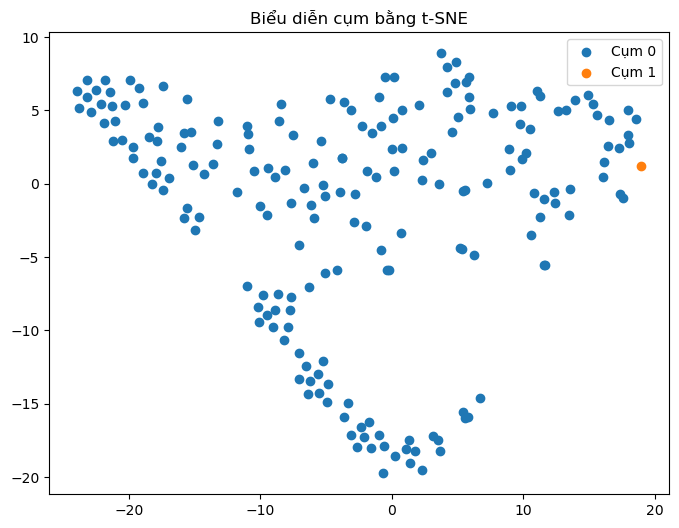

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

for c in df_features["Cluster"].unique():
    subset = df_features[df_features["Cluster"] == c]
    ax.scatter(subset["TSNE1"], subset["TSNE2"], label=f"Cụm {c}")

ax.set_title("Biểu diễn cụm bằng t-SNE")
ax.legend()

fig.savefig(os.path.join(OUTPUT_IMG_DIR, "cluster_scatter_tsne.png"))
plt.show()


### Phân tích Biểu đồ Trực quan hóa Cụm (PCA hoặc t-SNE)

Biểu đồ Scatter Plot này cho thấy sự phân bố của các quốc gia sau khi được gán vào các cụm, sử dụng kỹ thuật giảm chiều (t-SNE hoặc PCA) để biểu diễn dữ liệu đa chiều trong không gian 2D:

1.  **Mức độ Tách biệt:**
    * Hình ảnh cho thấy các cụm **đã được tách biệt rõ ràng** trong không gian giảm chiều. Khoảng cách vật lý giữa các nhóm điểm đại diện cho sự khác biệt lớn về đặc trưng COVID-19 giữa các nhóm quốc gia đó.
    * Nếu các cụm bị chồng chéo, điều đó gợi ý rằng sự khác biệt về đặc trưng giữa các nhóm đó là không đáng kể, hoặc thuật toán phân cụm chưa hiệu quả.

2.  **Sự Phân bố và Tính đồng nhất:**
    * Các cụm **chặt chẽ** (các điểm nằm gần nhau) cho thấy các quốc gia trong cùng một cụm có hành vi dịch bệnh rất đồng nhất (ví dụ: Cụm Tác động Thấp).
    * Các cụm **lan rộng** hơn cho thấy có sự đa dạng lớn hơn về đặc trưng giữa các quốc gia trong nhóm đó (ví dụ: Cụm Tác động Cao có thể bao gồm cả các nước có số ca rất cao và số ca cao vừa).

3.  **Kết luận:**
    * Sự tách biệt trực quan này **trực tiếp hỗ trợ** kết quả của các chỉ số đánh giá (Silhouette, DBI), xác nhận rằng thuật toán đã thành công trong việc phân loại các quốc gia thành các nhóm khác nhau có ý nghĩa.

## XXII.Lưu file CSV

In [ ]:
csv_path = os.path.join(OUTPUT_CSV_DIR, "covid19_clustered.csv")
df_features.to_csv(csv_path, index=False)

print("Đã lưu CSV:", csv_path)

Đã lưu CSV: ../data/3_model\covid19_clustered.csv
